In [2]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [3]:
inpath = "/sps/lsst/groups/clusters/cluster_comparison_project/after_matching/"
inpath1 = inpath + "cosmoDC2_amico.cosmoDC2.fzb/magy_v0/proximity_matching/deltaz_0.05_matchradius_1.0mpc_pref_angular_proximity/"
inpath2 = inpath + "cosmoDC2_amico.DC2.fzb.magy/DC2.masked_v0/proximity_matching/deltaz_0.05_matchradius_1.0mpc_pref_angular_proximity/"
outpath = "/sps/lsst/users/namourou/web/desc/cluster_comparison_project/amico.DC2.fzb/magy/amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy"
#outpath1 = outpath + "amico.cosmoDC2.fzb/magy/"
#outpath2 = outpath + "amico.DC2.fzb/magy/"
#outpathvs = outpath + "amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy/"

In [4]:
amcdc = Table.read(inpath1 + "output_catalog_12.fits")
amdc = Table.read(inpath2 + "output_catalog_12.fits")
c1cdc = Table.read(inpath1 + "cosmoDC2.v0.fits")
c2cdc = Table.read(inpath1 + "amico.cosmoDC2.fzb.magy.fits")
c1dc = Table.read(inpath2 + "cosmoDC2.DC2.masked.fits")
c2dc = Table.read(inpath2 + "amico.DC2.fzb.magy.v0.fits")

## Completeness & Purity (mean)

## Purity vs Completeness

Text(0.5, 1.0, 'Completeness versus SNR, redshift binned m$_{200c}>10^{14}$')

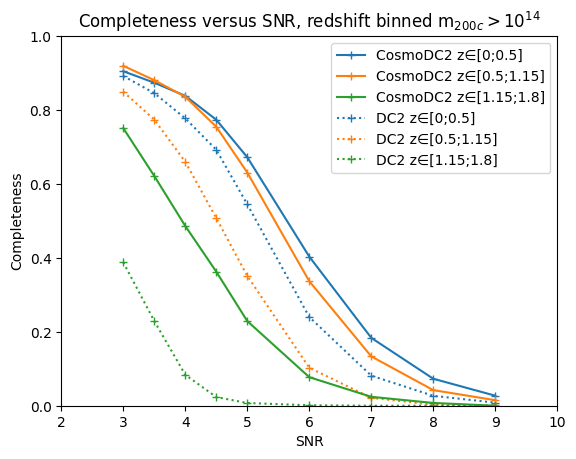

In [37]:
labels=['z∈[0;0.5]','z∈[0.5;1.15]','z∈[1.15;1.8]']
colors = ['#1f77b4', '#ff7f0e' , '#2ca02c']

nbins_x = 9
snrbins = [3,3.5,4,4.5,5,6,7,8,9]
zbins = [0,0.5,1.15,1.8]
nbins_z = len(zbins)

#prepare tables
c_merged_cdc=amcdc[amcdc['cat1_log10_mass']<100]
c_merged_dc=amdc[amdc['cat1_log10_mass']<100]
#c_merged=c_merged[c_merged['cat2_z_cl']<1.15]
#c_merged=c_merged[c_merged['cat1_z_cl']<1.15]
#c_merged_cut_dc=c_merged_dc[c_merged_dc['cat1_log10_mass']>14]

c_merged_cut_dc=c_merged_dc[c_merged_dc['cat1_log10_mass']>=14]
c_merged_cut_cdc=c_merged_cdc[c_merged_cdc['cat1_log10_mass']>=14]

c_halos_dc = c1dc[c1dc['log10_mass']>=14]
c_halos_cdc = c1cdc[c1cdc['log10_mass']>=14]
#c_halos = c_halos[c_halos['z_cl']<1.15]
c_halos_cut_dc = c_halos_dc[c_halos_dc['log10_mass']>=14]
c_halos_cut_cdc = c_halos_cdc[c_halos_cdc['log10_mass']>=14]

c_clusters_dc = c2dc[c2dc['snr_cl']>0]
c_clusters_cdc = c2cdc[c2cdc['snr_cl']>0]
#c_clusters = c_clusters[c_clusters['z_cl']<1.15]

compl_snr_dc = np.empty([nbins_z, nbins_x])
compl_snr_cdc = np.empty([nbins_z, nbins_x])

bin_z = np.empty([nbins_z-1])
for ix in range(nbins_z-1):
    bin_z[ix] = 0.5 * (zbins[ix] + zbins[ix+1])

for i in range(0,len(zbins)-1):
    zcut1 = zbins[i]
    zcut2 = zbins[i+1]
    c_halos_matched_dc = c_merged_cut_dc[(c_merged_cut_dc['cat1_z_cl']>zcut1)*(c_merged_cut_dc['cat1_z_cl']<zcut2)]
    c_halos_matched_cdc = c_merged_cut_cdc[(c_merged_cut_cdc['cat1_z_cl']>zcut1)*(c_merged_cut_cdc['cat1_z_cl']<zcut2)]
    for j in range(0,nbins_x):
        #print('-----'+str(j))
        cut1 = snrbins[j]
        c_halos_matched_dc = c_halos_matched_dc[(c_halos_matched_dc['cat2_snr_cl']>cut1)]
        c_halos_matched_cdc = c_halos_matched_cdc[(c_halos_matched_cdc['cat2_snr_cl']>cut1)]
        n_halos_matched_dc = len(c_halos_matched_dc)
        n_halos_matched_cdc = len(c_halos_matched_cdc)
        n_halos_dc = len(c_halos_cut_dc[(c_halos_cut_dc['z_cl']>zcut1)*(c_halos_cut_dc['z_cl']<zcut2)])
        n_halos_cdc = len(c_halos_cut_cdc[(c_halos_cut_cdc['z_cl']>zcut1)*(c_halos_cut_cdc['z_cl']<zcut2)])
        #print(n_halos_matched_dc)
        #print(n_halos_dc)
        #print(n_halos_matched_cdc)
        #print(n_halos_cdc)
        if n_halos_dc>5:
            compl_snr_dc[i][j] = round(n_halos_matched_dc/n_halos_dc,4)
        else : 
            compl_snr_dc[i][j] = np.nan
        if n_halos_cdc>5:
            compl_snr_cdc[i][j] = round(n_halos_matched_cdc/n_halos_cdc,4)
        else : 
            compl_snr_cdc[i][j] = np.nan
        #print(compl_snr[i][j])
    plt.plot(snrbins, compl_snr_cdc[i], color=colors[i], marker = "+", label = "CosmoDC2 " + labels[i])
    plt.plot(snrbins, compl_snr_dc[i], color=colors[i], marker = "+", linestyle = 'dotted', label = "DC2 " + labels[i])
plt.ylim(0, 1.0)
plt.xlim(2,10)
plt.xlabel('SNR')
plt.ylabel('Completeness')
handles, relabels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[relabels[idx] for idx in order])
plt.title("Completeness versus SNR, redshift binned m$_{200c}>10^{14}$")

Text(0.5, 1.0, 'Purity versus SNR, redshift binned')

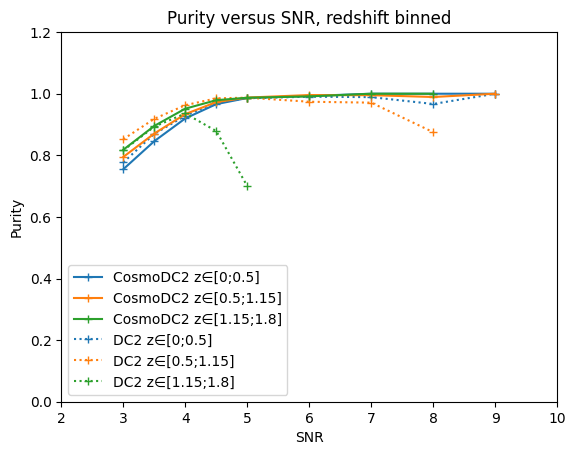

In [61]:
purity_snr_cdc = np.empty([nbins_z, nbins_x])
purity_snr_dc = np.empty([nbins_z, nbins_x])
c_merged_cut_dc=c_merged_dc[c_merged_dc['cat1_log10_mass']>=13]
c_merged_cut_cdc=c_merged_cdc[c_merged_cdc['cat1_log10_mass']>=13]
for i in range(0,len(zbins)-1):
    zcut1 = zbins[i]
    zcut2 = zbins[i+1]
    c_clusters_matched_cdc = c_merged_cut_cdc[(c_merged_cut_cdc['cat2_z_cl']>zcut1)*(c_merged_cut_cdc['cat2_z_cl']<zcut2)]
    c_clusters_matched_dc = c_merged_cut_dc[(c_merged_cut_dc['cat2_z_cl']>zcut1)*(c_merged_cut_dc['cat2_z_cl']<zcut2)]
    for j in range(0,nbins_x):
        #print('-----'+str(j))
        cut1 = snrbins[j]
        c_clusters_matched_cdc = c_clusters_matched_cdc[c_clusters_matched_cdc['cat2_snr_cl']>cut1]
        c_clusters_all_cdc = c_clusters_cdc[(c_clusters_cdc['snr_cl']>cut1) * (c_clusters_cdc['z_cl']>zcut1)*(c_clusters_cdc['z_cl']<zcut2)]
        n_clusters_matched_cdc = len(c_clusters_matched_cdc)
        n_clusters_all_cdc = len(c_clusters_all_cdc)
        c_clusters_matched_dc = c_clusters_matched_dc[c_clusters_matched_dc['cat2_snr_cl']>cut1]
        c_clusters_all_dc = c_clusters_dc[(c_clusters_dc['snr_cl']>cut1) * (c_clusters_dc['z_cl']>zcut1)*(c_clusters_dc['z_cl']<zcut2)]
        n_clusters_matched_dc = len(c_clusters_matched_dc)
        n_clusters_all_dc = len(c_clusters_all_dc)
        #print(n_clusters_matched)
        #print(n_clusters_all)
        if n_clusters_all_cdc>5:
            purity_snr_cdc[i][j] = round(n_clusters_matched_cdc/n_clusters_all_cdc,4)
        else : 
            purity_snr_cdc[i][j] = np.nan
        if n_clusters_all_dc>5:
            purity_snr_dc[i][j] = round(n_clusters_matched_dc/n_clusters_all_dc,4)
        else : 
            purity_snr_dc[i][j] = np.nan
        #print(purity_snr[i][j])
    plt.plot(snrbins, purity_snr_cdc[i], color=colors[i], marker = "+", label = "CosmoDC2 " + labels[i])
    plt.plot(snrbins, purity_snr_dc[i], color=colors[i], marker = "+", linestyle = 'dotted', label = "DC2 " + labels[i])
plt.ylim(0, 1.2)
plt.xlim(2,10)
plt.xlabel('SNR')
plt.ylabel('Purity')
handles, relabels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[relabels[idx] for idx in order])
plt.title("Purity versus SNR, redshift binned")

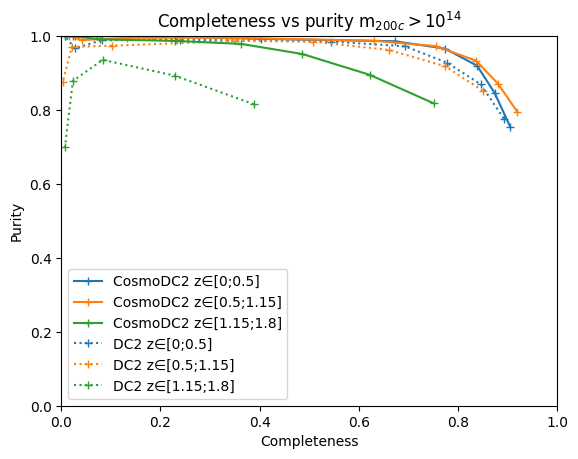

In [52]:
for i in range(0,len(zbins)-1):
    plt.plot(compl_snr_cdc[i], purity_snr_cdc[i], color=colors[i], marker = "+", label = "CosmoDC2 " + labels[i])
    plt.plot(compl_snr_dc[i], purity_snr_dc[i], color=colors[i], marker = "+", linestyle = 'dotted', label = "DC2 " + labels[i])
    plt.ylim(0., 1)
    plt.xlim(0, 1)
    plt.xlabel('Completeness')
    plt.ylabel('Purity')
    plt.title("Completeness vs purity m$_{200c}>10^{14}$")
    #plt.legend()
    #print(snrbins, compl_snr, purity_snr)
    #for j, label in enumerate(snrbins):
    #    plt.annotate(str(label), (compl_snr[i][j], purity_snr[i][j]))
handles, relabels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[relabels[idx] for idx in order])

Text(0.5, 1.0, 'Completeness versus SNR, m$_{200c}>10^{14}$')

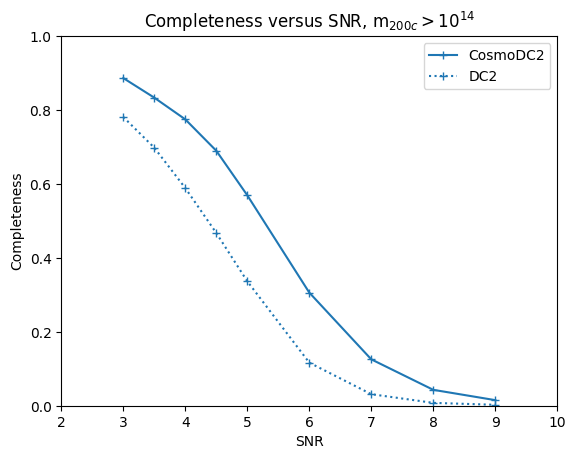

In [58]:
zcut2 = 1.8
compl_snr_dc_s = np.empty(nbins_x)
compl_snr_cdc_s = np.empty(nbins_x)
c_merged_cut_dc=c_merged_dc[c_merged_dc['cat1_log10_mass']>=14]
c_merged_cut_cdc=c_merged_cdc[c_merged_cdc['cat1_log10_mass']>=14]
c_halos_matched_dc = c_merged_cut_dc[(c_merged_cut_dc['cat1_z_cl']<zcut2)]
c_halos_matched_cdc = c_merged_cut_cdc[(c_merged_cut_cdc['cat1_z_cl']<zcut2)]
for j in range(0,nbins_x):
    #print('-----'+str(j))
    cut1 = snrbins[j]
    c_halos_matched_dc = c_halos_matched_dc[(c_halos_matched_dc['cat2_snr_cl']>cut1)]
    c_halos_matched_cdc = c_halos_matched_cdc[(c_halos_matched_cdc['cat2_snr_cl']>cut1)]
    n_halos_matched_dc = len(c_halos_matched_dc)
    n_halos_matched_cdc = len(c_halos_matched_cdc)
    n_halos_dc = len(c_halos_cut_dc[(c_halos_cut_dc['z_cl']<zcut2)])
    n_halos_cdc = len(c_halos_cut_cdc[(c_halos_cut_cdc['z_cl']<zcut2)])
    #print(n_halos_matched_dc)
    #print(n_halos_dc)
    #print(n_halos_matched_cdc)
    #print(n_halos_cdc)
    if n_halos_dc>5:
        compl_snr_dc_s[j] = round(n_halos_matched_dc/n_halos_dc,4)
    else : 
        compl_snr_dc_s[j] = np.nan
    if n_halos_cdc>5:
        compl_snr_cdc_s[j] = round(n_halos_matched_cdc/n_halos_cdc,4)
    else : 
        compl_snr_cdc_s[j] = np.nan
    #print(compl_snr[i][j])
plt.plot(snrbins, compl_snr_cdc_s, color=colors[0], marker = "+", label = "CosmoDC2")
plt.plot(snrbins, compl_snr_dc_s, color=colors[0], marker = "+", linestyle = 'dotted', label = "DC2")
plt.ylim(0, 1.0)
plt.xlim(2,10)
plt.xlabel('SNR')
plt.ylabel('Completeness')
plt.legend()
plt.title("Completeness versus SNR, m$_{200c}>10^{14}$")

Text(0.5, 1.0, 'Purity versus SNR')

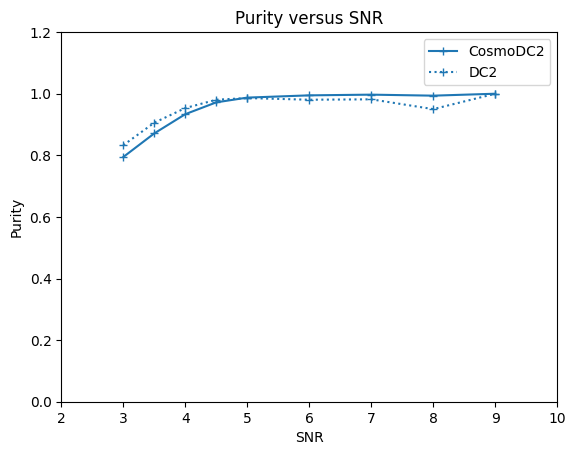

In [59]:
purity_snr_cdc_s = np.empty(nbins_x)
purity_snr_dc_s = np.empty(nbins_x)
zcut2 = 1.8
c_merged_cut_dc=c_merged_dc[c_merged_dc['cat1_log10_mass']>=13]
c_merged_cut_cdc=c_merged_cdc[c_merged_cdc['cat1_log10_mass']>=13]
c_clusters_matched_cdc = c_merged_cut_cdc[(c_merged_cut_cdc['cat2_z_cl']<zcut2)]
c_clusters_matched_dc = c_merged_cut_dc[(c_merged_cut_dc['cat2_z_cl']<zcut2)]
for j in range(0,nbins_x):
    #print('-----'+str(j))
    cut1 = snrbins[j]
    c_clusters_matched_cdc = c_clusters_matched_cdc[c_clusters_matched_cdc['cat2_snr_cl']>cut1]
    c_clusters_all_cdc = c_clusters_cdc[(c_clusters_cdc['snr_cl']>cut1) * (c_clusters_cdc['z_cl']<zcut2)]
    n_clusters_matched_cdc = len(c_clusters_matched_cdc)
    n_clusters_all_cdc = len(c_clusters_all_cdc)
    c_clusters_matched_dc = c_clusters_matched_dc[c_clusters_matched_dc['cat2_snr_cl']>cut1]
    c_clusters_all_dc = c_clusters_dc[(c_clusters_dc['snr_cl']>cut1) * (c_clusters_dc['z_cl']<zcut2)]
    n_clusters_matched_dc = len(c_clusters_matched_dc)
    n_clusters_all_dc = len(c_clusters_all_dc)
    #print(n_clusters_matched)
    #print(n_clusters_all)
    if n_clusters_all_cdc>5:
        purity_snr_cdc_s[j] = round(n_clusters_matched_cdc/n_clusters_all_cdc,4)
    else : 
        purity_snr_cdc_s[j] = np.nan
    if n_clusters_all_dc>5:
        purity_snr_dc_s[j] = round(n_clusters_matched_dc/n_clusters_all_dc,4)
    else : 
        purity_snr_dc_s[j] = np.nan
    #print(purity_snr[i][j])
plt.plot(snrbins, purity_snr_cdc_s, color=colors[0], marker = "+", label = "CosmoDC2" )
plt.plot(snrbins, purity_snr_dc_s, color=colors[0], marker = "+", linestyle = 'dotted', label = "DC2" )
plt.ylim(0, 1.2)
plt.xlim(2,10)
plt.xlabel('SNR')
plt.ylabel('Purity')
plt.legend()
plt.title("Purity versus SNR")

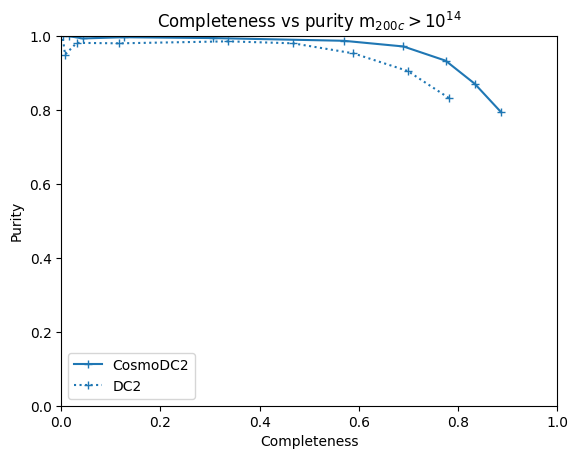

In [60]:
plt.plot(compl_snr_cdc_s, purity_snr_cdc_s, color=colors[0], marker = "+", label = "CosmoDC2")
plt.plot(compl_snr_dc_s, purity_snr_dc_s, color=colors[0], marker = "+", linestyle = 'dotted', label = "DC2")
plt.ylim(0., 1)
plt.xlim(0, 1)
plt.xlabel('Completeness')
plt.ylabel('Purity')
plt.title("Completeness vs purity m$_{200c}>10^{14}$")
#plt.legend()
#print(snrbins, compl_snr, purity_snr)
#for j, label in enumerate(snrbins):
#    plt.annotate(str(label), (compl_snr[i][j], purity_snr[i][j]))
plt.legend()